In [1]:
from lineagegrn.plot.analysis_result import *
from lineagegrn.downstream_analysis import *
from lineagegrn.utils.constant import *
from lineagegrn.utils.synthetic_data_generation import *
from lineagegrn.cell_fate_map import *
from lineagegrn.gene_regulatory_network import*
from lineagegrn.utils.metrics import *

### Reconstructing cell fate map

In [2]:
sc_mat = np.array(pd.read_csv('examples/data/zebrafish/input_data/barcode_site.csv', index_col=0))
cell_types = pd.read_csv("examples/data/zebrafish/input_data/cell_types.csv", index_col=0).to_dict()['celltypes']
t_S = 15

edges, fate_map = construct_fate_map(sc_mat, cell_types, t_S, beta=1, max_iter=100, tol=1e-1, output_edges=True)

Iteration 1...
Difference in alpha_vector: 2.590881974547545
Iteration 2...
Difference in alpha_vector: 0.010175436874542101
Convergence achieved!


### Inferring dynamic gene regulatory networks

In [3]:
saved_dir = 'examples/results/zebrafish/inferred_grns'
atac_file_path = "examples/data/zebrafish/input_data/atac_data.csv"
expression_file_path = "examples/data/zebrafish/input_data/expression_data.csv"

regulator_names=list(pd.read_csv("examples/data/zebrafish/additional_input_data/regulatory_genes_name.csv")['x'])
target_gene_names=list(pd.read_csv("examples/data/zebrafish/additional_input_data/target_genes_name.csv")['x'])

#grn_inference_result = GRNInference(atac_file_path, expression_file_path, fate_map, saved_dir)
#grn_inference_result.infer_grn(20)
#target_networks_dict = grn_inference_result.get_target_networks(0)

dynamic_networks_dict = get_dynamic_networks(saved_dir, fate_map, 0.01, regulator_names, target_gene_names)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

### Revealing the reconfiguration pattern of inferred GRNs along cell lineages

In [4]:
regulator_dict = get_regulators_for_target_gene('admb', 'Tcells', saved_dir, regulator_names)
print(regulator_dict)

{'nr4a1': 0.11820739479348702, 'mafbb': 0.42294663184352077, 'en1a': 0.6564480066299438, 'rorc': 0.0, 'nfatc2b': 0.6564480066299438, 'tbx21': -0.056909992170777975, 'phox2a': 0.6564480066299438, 'pax1a': 0.6564480066299438, 'runx3': 0.15009606399218658, 'gfi1ab': 0.6564480066299438, 'elf3': 0.6564480066299438, 'foxp3a': 0.011443057629734311, 'foxi3b': 0.6564480066299438, 'nr1d4a': 0.0, 'foxd3': 0.6564480066299438, 'irx1b': 0.6564480066299438, 'irx6a': 0.6564480066299438, 'jun': 0.1178025655716669, 'fosl1a': 0.31433853341523377, 'egr1': 0.20475657948703843, 'hsf4': 0.6564480066299438, 'tbpl2': 0.6564480066299438, 'tal2': 0.0, 'isl1': 0.6564480066299438, 'nkx2.5': 0.20596440728332832, 'lhx1a': 0.6564480066299438, 'msc': 0.6564480066299438, 'myog': 0.6564480066299438, 'gbx1': 0.6564480066299438, 'uncx4.1': 0.6564480066299438, 'ascl1a': 0.0, 'nfe2': 0.6564480066299438, 'klf2a': 0.24611560163907603, 'atoh1a': 0.0, 'nr5a1a': 0.0, 'cebpb': 0.1170890726511801, 'pax2a': 0.6564480066299438, 'atf

In [5]:
target_dict = get_targets_for_regulator_gene('tbx21', 'Tcells', saved_dir, regulator_names)
print(target_dict)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\downstream_analysis\dynamic_network_statistics.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  target_gene_dict.update({target_gene_id: float(target_id_node_id_grn.loc[:, regulator_id])})


{'acta2': -0.003577850172468886, 'acyp2': 0.0, 'adh8a': -0.008127470553522764, 'admb': -0.056909992170777975, 'akap12b': 0.0009152792377499775, 'AL929171.1': -7.651249789373292e-05, 'apln': -0.0008826116685969871, 'aqp1a.1': 0.7394545546014568, 'aqp8a.1': -0.06092678062851799, 'asz1': 8.060896580213827e-06, 'atp1a3b': -0.07326309531800515, 'atp2a2a': -0.0157216567531016, 'blf': -0.048034105986797374, 'btg2': 0.010332999381144346, 'BX000363.1': -0.0045508639065524395, 'BX005058.1': 0.00015491640874275696, 'BX005375.1': -2.168788364349602e-05, 'BX120005.1': 0.08503209137964575, 'BX897740.1': -3.6427547227712805e-05, 'BX901962.4': 0.00016400156230110525, 'c4': -0.004399455769854894, 'CABZ01044764.2': 0.0001398817588508036, 'cd74a': 0.040382683353447725, 'cd7al': 0.007645881374354561, 'cd9b': -0.004193184983118181, 'cfd': -0.07654203921815995, 'col1a1b': 0.00042588572386555125, 'col5a1': -0.008493513709059737, 'cox7a1': -0.07488570167504725, 'CR318588.3': -0.02950471770806141, 'CR759878.1'

In [6]:
output_path = 'examples/results/zebrafish/figures/'
path=list(fate_map.nodes.keys())

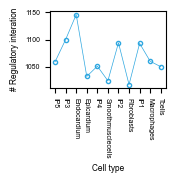

In [7]:
plot_regulatory_interactions_along_fatemap(dynamic_networks_dict, list(fate_map.nodes.keys()), output_path)

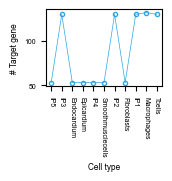

In [8]:
plot_regulatory_genes_along_fatemap(saved_dir, regulator_names, 'tbx21', list(fate_map.nodes.keys()), 0, output_path)

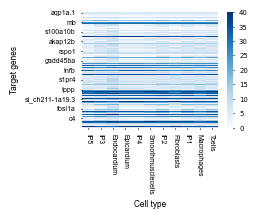

In [9]:
plot_target_genes_along_fatemap(target_gene_names, regulator_names,'negative', saved_dir, list(fate_map.nodes.keys()), 0, output_path)

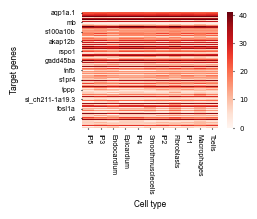

In [10]:
plot_target_genes_along_fatemap(target_gene_names, regulator_names,'positive', saved_dir, list(fate_map.nodes.keys()), 0, output_path)

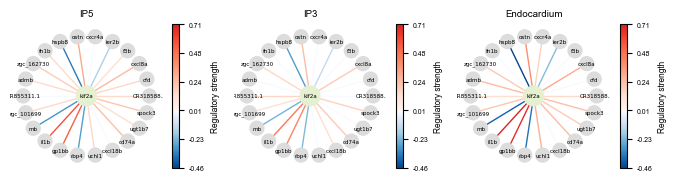

In [11]:
path = fate_map.get_path("Endocardium")
plot_regulatory_network_along_fatemap('klf2a', dynamic_networks_dict, path, output_path, 0.12)

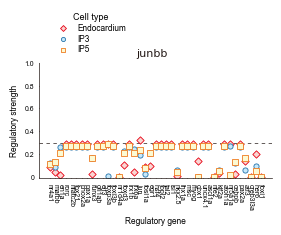

In [12]:
path = fate_map.get_path("Endocardium")
plot_regulatory_strength_along_fatemap(saved_dir, path, regulator_names, 'junbb', output_path)

### Identifying key regulatory genes

#### Identifying regulatory genes key for differentiation

In [13]:
Endocardium_gene_expression_matrix = pd.read_csv('examples/data/zebrafish/additional_input_data/Exp_Endocardium.csv', index_col=0)
Epicardium_gene_expression_matrix = pd.read_csv('examples/data/zebrafish/additional_input_data/Exp_Epicardium.csv', index_col=0)
Fibroblasts_gene_expression_matrix = pd.read_csv('examples/data/zebrafish/additional_input_data/Exp_Fibroblasts.csv', index_col=0)
Smoothmusclecells_gene_expression_matrix = pd.read_csv('examples/data/zebrafish/additional_input_data/Exp_muscle.csv', index_col=0)
Macrophages_gene_expression_matrix = pd.read_csv('examples/data/zebrafish/additional_input_data/Exp_Macrophages.csv', index_col=0)
Tcells_gene_expression_matrix = pd.read_csv('examples/data/zebrafish/additional_input_data/Exp_tcell.csv', index_col=0)

Endocardium_gene_expression_matrix.index = Epicardium_gene_expression_matrix.index = Fibroblasts_gene_expression_matrix.index = Smoothmusclecells_gene_expression_matrix.index = Macrophages_gene_expression_matrix.index = Tcells_gene_expression_matrix.index = target_gene_names + regulator_names

In [14]:
Endocardium_genes = [i for i in get_high_expression_genes(Endocardium_gene_expression_matrix) if i in(target_gene_names)]
Epicardium_genes = [i for i in get_high_expression_genes(Epicardium_gene_expression_matrix) if i in(target_gene_names)]
Fibroblasts_genes = [i for i in get_high_expression_genes(Fibroblasts_gene_expression_matrix) if i in(target_gene_names)]
Smoothmusclecells_genes = [i for i in get_high_expression_genes(Smoothmusclecells_gene_expression_matrix) if i in(target_gene_names)]
Macrophages_genes = [i for i in get_high_expression_genes(Macrophages_gene_expression_matrix) if i in(target_gene_names)]
Tcells_genes = [i for i in get_high_expression_genes(Tcells_gene_expression_matrix) if i in(target_gene_names)]

In [15]:
high_expression_gene_dict = {'Endocardium':Endocardium_genes, 'Epicardium':Epicardium_genes, 'Fibroblasts':Fibroblasts_genes, 'Smoothmusclecells':Smoothmusclecells_genes, 'Macrophages':Macrophages_genes, 'Tcells':Tcells_genes, 'IP1':None, 'IP2':None, 'IP3':None, 'IP4':None, 'IP5':None}
fate_map = FateMap(edges, high_expression_gene_dict)

In [16]:
key_regulators_df_concat = pd.DataFrame()

nodes = fate_map.node_internals[::-1]+[fate_map.node_root]
for node in nodes:
    key_regulators = identify_key_genes_differentiation(saved_dir, fate_map, 0.11, regulator_names, target_gene_names, node)
    high_expression_genes_of_ancestor_node = list(set(key_regulators.loc[((key_regulators['DRS']>0.35) & (key_regulators['DRC']>0.6)),'regulator_id']) & set(target_gene_names))
    high_expression_gene_dict[node] = high_expression_genes_of_ancestor_node
    fate_map = FateMap(edges,high_expression_gene_dict)
    key_regulators_df_concat = pd.concat([key_regulators_df_concat, key_regulators])

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\plot\analysis_result.py:608: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, color='black', fontsize=5, fontname='Arial', va='center')
-2025-06-29 11:43:12,127-WARNING-16108 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


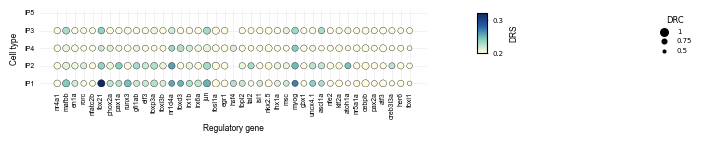

<Axes: xlabel='Regulatory gene', ylabel='Cell type'>

In [17]:
nodes = list(key_regulators_df_concat['node_id'].drop_duplicates())
key_regulators_df_concat_V2 = key_regulators_df_concat.fillna(0)
plot_key_genes_differentiation(key_regulators_df_concat_V2, nodes, regulator_names, output_path)

#### Identifying regulatory genes key for fate bias

In [18]:
ancestor_node_id = 'IP3'
child_nodes = [fate_map.nodes[ancestor_node_id].directed_edges[i].end for i in range(2)]
print(child_nodes)
high_expression_target_genes_in_child_1 = fate_map.nodes[child_nodes[0]].high_expression_genes_in_leaf
high_expression_target_genes_in_child_2 = fate_map.nodes[child_nodes[1]].high_expression_genes_in_leaf
 
Tar_1 = list(set(target_gene_names) & set(high_expression_target_genes_in_child_1) - set(high_expression_target_genes_in_child_2))
Tar_2 = list(set(target_gene_names) & set(high_expression_target_genes_in_child_2) - set(high_expression_target_genes_in_child_1))


key_regulators_df_IP3 = identify_key_genes_fate_bias(dynamic_networks_dict, 'IP4', Tar_1, Tar_2, regulator_names)

['Endocardium', 'Epicardium']


-2025-06-29 11:43:12,454-WARNING-16108 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(38, 5)


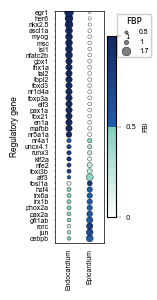

In [19]:
df1 = key_regulators_df_IP3[0][['Regulatory gene', 'FBI', 'FBP']].reset_index(drop=True)
df2 = key_regulators_df_IP3[1][['Regulatory gene', 'FBI', 'FBP']]
merged_df = df1.merge(
    df2, 
    on = 'Regulatory gene', 
    how = 'left',  
    suffixes = (f'_{child_nodes[0]}', f'_{child_nodes[1]}')
)

plot_key_genes_fate_bias(merged_df, child_nodes, output_path, figsize=(1.5, 3))

### Identifying constitutive and specific regulatory interactions

In [20]:
X, centers, weight_matrix = cluster_regulatory_interactions(saved_dir, fate_map, 0.1, regulator_names, target_gene_names, len(regulator_names), len(target_gene_names), 4, 2)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

In [21]:
edges_cluster_to_nodes = identify_regulatory_interactions_specificity(saved_dir, fate_map, 0.1, regulator_names, target_gene_names, 4, 0.4, X, len(regulator_names), len(target_gene_names), weight_matrix)

d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\projects\LineageGRN\LineageGRN_V2\LineageGRN\lineagegrn\utils\basic.py:259: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grn_df = grn_df.applymap(lambda x: 0 if abs(x) < threshold else x)  # Apply threshold
d:\p

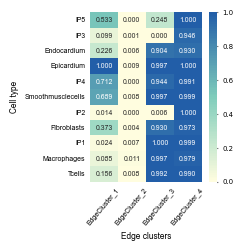

In [22]:
plot_regulatory_interactions_in_celltypes(edges_cluster_to_nodes, output_path)